In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer # used to handle missing values
from sklearn.preprocessing import MinMaxScaler # used to normalizeing data
from sklearn.preprocessing import StandardScaler # used to standardizes features
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [28]:
class Preprocessor:
    def __init__(self, data: pd.DataFrame) -> None:
        self.data = data # store the input dataframe
        self.numeric_features = data.select_dtypes(include=[np.number]).columns.tolist() # indetify and store numeric columns in the dataset
        self.categorical_features = [col for col in data.columns if col not in self.numeric_features] # indetify and store categorical columns by excluding numeric columns

    def fill_missing_values(self) -> pd.DataFrame:
        self.data.replace(r'^\s*$', np.nan, regex=True, inplace=True) # replace cells with only white space with NaN

        # fill missing numeric values with mean
        if self.numeric_features:
            imputer = SimpleImputer(strategy='mean')
            self.data[self.numeric_features] = imputer.fit_transform(self.data[self.numeric_features])

        # fill missing categorical values with mode
        if self.categorical_features:
          for col in self.categorical_features:
              mode_value = self.data[col].mode()[0]  # getting the mode for the column
              self.data[col].fillna(mode_value, inplace=True)  # filling missing values with the mode

        return self.data

    def normalize(self, scaler=MinMaxScaler) -> pd.DataFrame:
        if self.numeric_features:
            sc = scaler() # initializing the specified scaler
            self.data[self.numeric_features] = sc.fit_transform(self.data[self.numeric_features]) # applying the normalization to the numeric features.

        return self.data

    def encode_categorical_features(self) -> pd.DataFrame:
        if self.categorical_features:
            dummies = pd.get_dummies(self.data[self.categorical_features], drop_first=True) # one hot encoding for categorical features
            self.data = self.data.drop(columns=self.categorical_features) # droping the original categorical features
            self.data = pd.concat([self.data, dummies], axis=1) # concatenating the encoded features

        return self.data

In [29]:
class onlineA1Preprocessor(Preprocessor):
    def __init__(self) -> None:
        data = pd.read_csv('/content/drive/MyDrive/MLData/A1.csv')
        # print(data)
        self.y = data['y']
        data.drop(['y'], axis=1, inplace=True) # dropping y as it now stored in self.y
        super().__init__(data) # calling the constructor of the parent Preprocessor class and passing the processed DataFrame which is defined as data

    def preprocess(self) -> list:
        self.fill_missing_values()
        self.normalize()
        self.encode_categorical_features()
        return self.data, self.y # returning the preprocessed features self.data and target variable self.y

    def split(self) -> list:
        return train_test_split(self.data, self.y, test_size=0.2, random_state=42) # spliting the data with 80% for training and 20% for testing and random_state is 42 to ensure reproducibility
# preprocessor = onlineA1Preprocessor()

In [30]:
class onlineB1Preprocessor(Preprocessor):
    def __init__(self) -> None:
        data = pd.read_csv('/content/drive/MyDrive/MLData/B1.csv')
        # print(data)
        self.y = data['y']
        data.drop(['y'], axis=1, inplace=True) # dropping y as it now stored in self.y
        super().__init__(data) # calling the constructor of the parent Preprocessor class and passing the processed DataFrame which is defined as data

    def preprocess(self) -> list:
        self.fill_missing_values()
        self.normalize()
        self.encode_categorical_features()
        return self.data, self.y # returning the preprocessed features self.data and target variable self.y

    def split(self) -> list:
        return train_test_split(self.data, self.y, test_size=0.2, random_state=42) # spliting the data with 80% for training and 20% for testing and random_state is 42 to ensure reproducibility
# preprocessor = onlineB1Preprocessor()

In [31]:
class onlineB2Preprocessor(Preprocessor):
    def __init__(self) -> None:
        data = pd.read_csv('/content/drive/MyDrive/MLData/B2.csv')
        # print(data)
        self.y = data['y']
        data.drop(['y'], axis=1, inplace=True) # dropping y as it now stored in self.y
        super().__init__(data) # calling the constructor of the parent Preprocessor class and passing the processed DataFrame which is defined as data

    def preprocess(self) -> list:
        self.fill_missing_values()
        self.normalize()
        self.encode_categorical_features()
        return self.data, self.y # returning the preprocessed features self.data and target variable self.y

    def split(self) -> list:
        return train_test_split(self.data, self.y, test_size=0.2, random_state=42) # spliting the data with 80% for training and 20% for testing and random_state is 42 to ensure reproducibility
# preprocessor = onlineB2Preprocessor()

In [32]:
class TelcoChurnPreprocessor(Preprocessor):
    def __init__(self) -> None:
        data = pd.read_csv('/content/drive/MyDrive/MLData/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        # print(data)
        self.y = data['Churn'].map({'Yes': 1, 'No': 0}) # converting the target variable ('Churn') into numerical format
        data.drop(['customerID', 'Churn'], axis=1, inplace=True) # dropping the customerID as it is not needed for analysis and dropping Churn as it now stored in self.y
        data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # converting the column to numeric, coercing any errors to NaN like if there are non-numeric entries

        super().__init__(data) # calling the constructor of the parent Preprocessor class and passing the processed DataFrame which is defined as data

    def preprocess(self) -> list:
        self.fill_missing_values()
        self.normalize()
        self.encode_categorical_features()

        return self.data, self.y # returning the preprocessed features self.data and target variable self.y

    def split(self) -> list:
        return train_test_split(self.data, self.y, test_size=0.2, random_state=42) # spliting the data with 80% for training and 20% for testing and random_state is 42 to ensure reproducibility
# preprocessor = TelcoChurnPreprocessor()

In [33]:
class CreditCardPreprocessor(Preprocessor):
    def __init__(self) -> None:
        data = pd.read_csv('/content/drive/MyDrive/MLData/creditcard.csv')
        # print(data)
        data = pd.concat([data[data['Class'] == 1], data[data['Class'] == 0].sample(n=20000, random_state=42)]) # keeping all positive examples and 20k negative exampples and ensuring reproducibility of sampling
        self.y = data['Class'] # storing the target variable
        data.drop(['Class'], axis=1, inplace=True) #  dropping Class as it now stored in self.y

        super().__init__(data) # calling the constructor of the parent Preprocessor class and passing the processed DataFrame which is defined as data

    def preprocess(self) -> list:
        self.fill_missing_values()
        self.normalize(StandardScaler)
        return self.data, self.y

    def split(self) -> list:
        return train_test_split(self.data, self.y, test_size=0.2, random_state=42)
# preprocessor = CreditCardPreprocessor()

In [34]:
class AdultPreprocessor(Preprocessor):
    def __init__(self) -> None:
        data_train = pd.read_csv('/content/drive/MyDrive/MLData/adult/adult.data', header=None) # reading the train dataset
        # print(data_train.head())
        data_train.columns = ['age', 'workclass', 'fnlwgt', 'education',
            'education-num', 'marital-status', 'occupation', 'relationship',
            'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week',
            'native-country', 'income'
        ]

        data_test = pd.read_csv('/content/drive/MyDrive/MLData/adult/adult.test', header=None, skiprows=1) # reading the test dataset
        # print(data_test.head())
        data_test.columns = data_train.columns

        self.X_train = data_train[data_train.columns[:-1]] # storing the feature columns except income
        self.y_train = data_train[data_train.columns[-1]] # storing the target variable income

        self.X_test = data_test[data_test.columns[:-1]] # storing the feature columns except income
        self.y_test = data_test[data_test.columns[-1]] # storing the target variable income

        self.numeric_features = self.X_train.select_dtypes(include=np.number).columns # identifying numeric columns in the training data
        self.categorical_features = list(set(self.X_train.columns) - set(self.numeric_features)) # identifying categorical columns

    def fill_missing_values(self) -> None:
        self.X_train.replace(r'^\s*$', np.nan, regex=True, inplace=True) # replace cells with only white space with NaN from train dataset
        self.X_test.replace(r'^\s*$', np.nan, regex=True, inplace=True) # replace cells with only white space with NaN from test dataset

        numeric_features = self.numeric_features # taking mean of numeric columns of train dataset

        # fill missing numeric values with mean
        if len(numeric_features) > 0:
            imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            self.X_train[numeric_features] = imputer.fit_transform(self.X_train[numeric_features])
            self.X_test[numeric_features] = imputer.transform(self.X_test[numeric_features])

         # fill missing categorical values with mode
        categorical_features = self.categorical_features
        if len(categorical_features) > 0:
            for feature in categorical_features:
                mode_value = self.X_train[feature].mode()[0] # calculating mode of the feature from the training dataset
                # fill missing values in both training and test datasets with the mode value
                self.X_train[feature] = self.X_train[feature].fillna(mode_value)
                self.X_test[feature] = self.X_test[feature].fillna(mode_value)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def encode_categorical_features(self) -> pd.DataFrame:
        self.y_test = self.y_test.str.replace(".", "") # removeing the . from the test set's target variable income

        # encoding the target variable income into binary values
        encoder = LabelEncoder()
        encoder.fit(self.y_train)
        self.y_train = encoder.transform(self.y_train)
        self.y_test = encoder.transform(self.y_test)

        # convert to DataFrame
        self.y_train = pd.DataFrame(self.y_train)
        self.y_test = pd.DataFrame(self.y_test)

        # encoding the categorical features of train dataset
        categorical_features = self.categorical_features
        if len(categorical_features) > 0:
            encoder = OneHotEncoder(handle_unknown='ignore') # useing the handle_unknown='ignore' option to ensure that new categories in the test set don't cause issues
            encoder.fit(self.X_train[categorical_features])

            self.X_train = encoder.transform(self.X_train[categorical_features])
            self.X_test = encoder.transform(self.X_test[categorical_features])

        # convert to Dataframe
        self.X_train = pd.DataFrame(self.X_train.toarray())
        self.X_test = pd.DataFrame(self.X_test.toarray())

        return self.X_train, self.X_test, self.y_train, self.y_test

    def normalize(self, scaler = MinMaxScaler) -> pd.DataFrame:
        numeric_features = self.numeric_features

        if len(numeric_features) > 0:
            sc = scaler()
            # first, fiting the scaler on the training data and then applies the same transformation to the test data
            sc.fit(self.X_train[numeric_features])

            self.X_train[numeric_features] = sc.transform(self.X_train[numeric_features])
            self.X_test[numeric_features] = sc.transform(self.X_test[numeric_features])

        return self.X_train, self.X_test, self.y_train, self.y_test

    def preprocess(self) -> list:
        self.fill_missing_values()
        self.normalize(StandardScaler)
        self.encode_categorical_features()

        # return self.X_train, self.X_test, self.y_train, self.y_test
        return self.X_train, self.y_train

    def split(self) -> list:
        return self.X_train, self.X_test, self.y_train, self.y_test
# preprocessor = AdultPreprocessor()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.utils import resample
from sklearn.base import BaseEstimator, ClassifierMixin

In [36]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.15, n_iterations=1000):
        self.learning_rate = learning_rate # defining the step size for updating weights during gradient descent
        self.n_iterations = n_iterations # number of times the model iterates over the training data to adjust the weights

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64) # input features are converted to a NumPy array of type float64 for numeric computations
        y = np.array(y).reshape(-1, 1)  # target value reshaped into a column vector becomes a 2D array of shape (n_samples, 1)
        X = np.insert(X, 0, 1, axis=1)  # adding bias term allowing the model to learn an intercept
        self.theta = np.zeros((X.shape[1], 1))  # self.theta is the vector of weights initialized to zeros, with a shape of (n_features + 1, 1) to include the bias term.

        for _ in range(self.n_iterations):
            z = np.dot(X, self.theta) # linear combination of inputs and weights
            h = 1 / (1 + np.exp(-z)) # predicted probability, calculated using the sigmoid function
            gradient = np.dot(X.T, (h - y)) / y.size # partial derivative of the cost function with respect to the weights, used to update theta
            gradient[1:] += (1 / 50) * np.sign(self.theta[1:]) # applying L2 regularization

            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.array(X, dtype=np.float64) # input features are converted to a NumPy array of type float64 for numeric computations
        X = np.insert(X, 0, 1, axis=1) # adding bias term
        z = np.dot(X, self.theta) # linear combination of inputs and weights
        h = 1 / (1 + np.exp(-z)) # predicted probability using the sigmoid function
        return (h >= 0.5).astype(int).flatten() # predictions using a 0.5 threshold: ℎ≥0.5 predicts class 1, otherwise, class 0, returning a 1D array

    # this method returns a 2D array of predicted probabilities for binary classes, with each row showing class 0 (1−h) and class 1 (h)
    def predict_proba(self, X):
      X = np.array(X, dtype=np.float64)
      X = np.insert(X, 0, 1, axis=1)
      z = np.dot(X, self.theta)
      h = 1 / (1 + np.exp(-z))
      return np.column_stack((1 - h, h))

In [37]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
# BaggingLR class
class BaggingLR:
    def __init__(self, n_estimators=9, custom=True):
        self.n_estimators = n_estimators
        self.custom = custom
        self.models = []

    def fit(self, X, y):
        for i in range(self.n_estimators):
            # Create bootstrap samples
            X_sample, y_sample = resample(X, y, replace=True, n_samples=len(X), random_state=42+i)

            if self.custom:
                model = CustomLogisticRegression()
            else:
                model = LogisticRegression()

            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=0).round().astype(int)

    def predict_proba(self, X):
        probas = np.array([model.predict_proba(X) for model in self.models])
        return np.mean(probas, axis=0)

In [38]:
# StackingEnsemble class
class StackingEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimators, meta_classifier):
        self.base_estimators = base_estimators
        self.meta_classifier = meta_classifier

    def fit(self, X_train, y_train, X_val, y_val):
        # Fit base estimators on the training data
        for estimator in self.base_estimators:
            estimator.fit(X_train, y_train)

        # Generate meta-features using the validation set
        meta_features = np.column_stack([X_val] + [estimator.predict(X_val) for estimator in self.base_estimators])

        # Fit the meta-classifier on the meta-features
        self.meta_classifier.fit(meta_features, y_val)

    def predict(self, X):
        # Generate meta-features for prediction
        meta_features = np.column_stack([X] + [estimator.predict(X) for estimator in self.base_estimators])
        return self.meta_classifier.predict(meta_features)

    def predict_proba(self, X):
        # Generate meta-features for probability prediction
        meta_features = np.column_stack([X] + [estimator.predict(X) for estimator in self.base_estimators])
        return self.meta_classifier.predict_proba(meta_features)


In [39]:
# Function to create and train the stacking ensemble
def stacking_ensemble(X_train, y_train, X_val, y_val, custom=True):
    # Create base models using bagging
    bagging = BaggingLR(n_estimators=9, custom=custom)
    bagging.fit(X_train, y_train)
    base_models = bagging.models

    # Create meta-classifier
    if custom:
        meta_model = CustomLogisticRegression()
    else:
        meta_model = LogisticRegression()

    # Create and train stacking ensemble
    stacking = StackingEnsemble(base_models, meta_model)
    stacking.fit(X_train, y_train, X_val, y_val)

    return stacking, base_models

In [40]:
class MajorityVotingEnsemble:
    def __init__(self, estimators):
        self.estimators = estimators

    def fit(self, X, y):
        for estimator in self.estimators:
            estimator.fit(X, y)

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators])
        return np.mean(predictions, axis=0).round()

In [41]:
def evaluate_model(y_true, y_pred, y_prob):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    y_prob = np.ravel(y_prob)

    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Sensitivity': recall_score(y_true, y_pred, average='binary'),
        'Specificity': recall_score(y_true, y_pred, pos_label=0, average='binary'),
        'Precision': precision_score(y_true, y_pred, average='binary'),
        'F1-score': f1_score(y_true, y_pred, average='binary'),
        'AUROC': roc_auc_score(y_true, y_prob),
        'AUPR': average_precision_score(y_true, y_prob)
    }

In [48]:
# Main execution block
if __name__ == "__main__":
    np.random.seed(42) # random seed for reproducibility

    # preprocessing data
    # preprocessor = onlineA1Preprocessor()
    # preprocessor = onlineB1Preprocessor()
    # preprocessor = onlineB2Preprocessor()
    # preprocessor = TelcoChurnPreprocessor()
    # preprocessor = AdultPreprocessor()
    preprocessor = CreditCardPreprocessor()
    X, y = preprocessor.preprocess()
    X_train, X_test, y_train, y_test = preprocessor.split()

    # Split training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Convert to NumPy arrays and flatten
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    y_val = y_val.values.ravel()

    # Train and evaluate single Custom Logistic Regression
    lr = CustomLogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_val)
    y_prob_lr = lr.predict_proba(X_val)
    lr_results = evaluate_model(y_val, y_pred_lr, y_prob_lr[:,1])

    # Train and evaluate Stacking Ensemble
    stacking_model, base_models = stacking_ensemble(X_train, y_train, X_val, y_val, custom=True)
    y_pred_stacking = stacking_model.predict(X_test)
    y_prob_stacking = stacking_model.predict_proba(X_test)[:, 1]
    stacking_results = evaluate_model(y_test, y_pred_stacking, y_prob_stacking)

    # Train and evaluate Majority Voting Ensemble
    voting_ensemble = MajorityVotingEnsemble(base_models)
    y_pred_voting = voting_ensemble.predict(X_test)
    voting_results = evaluate_model(y_test, y_pred_voting, y_pred_voting)

    # Print results
    print("Single LR Results:")
    print(lr_results)
    print("\nVoting Ensemble Results:")
    print(voting_results)
    print("\nStacking Ensemble Results:")
    print(stacking_results)

Single LR Results:
{'Accuracy': 0.9905458981396768, 'Sensitivity': 0.5866666666666667, 'Specificity': 1.0, 'Precision': 1.0, 'F1-score': 0.7394957983193278, 'AUROC': 0.9728672492717436, 'AUPR': 0.9070659653794458}

Voting Ensemble Results:
{'Accuracy': 0.9895096364967065, 'Sensitivity': 0.5520833333333334, 'Specificity': 1.0, 'Precision': 1.0, 'F1-score': 0.7114093959731543, 'AUROC': 0.7760416666666667, 'AUPR': 0.5625736968366268}

Stacking Ensemble Results:
{'Accuracy': 0.9895096364967065, 'Sensitivity': 0.5625, 'Specificity': 0.9997501873594804, 'Precision': 0.9818181818181818, 'F1-score': 0.7152317880794702, 'AUROC': 0.9379579898409526, 'AUPR': 0.8569433435864472}


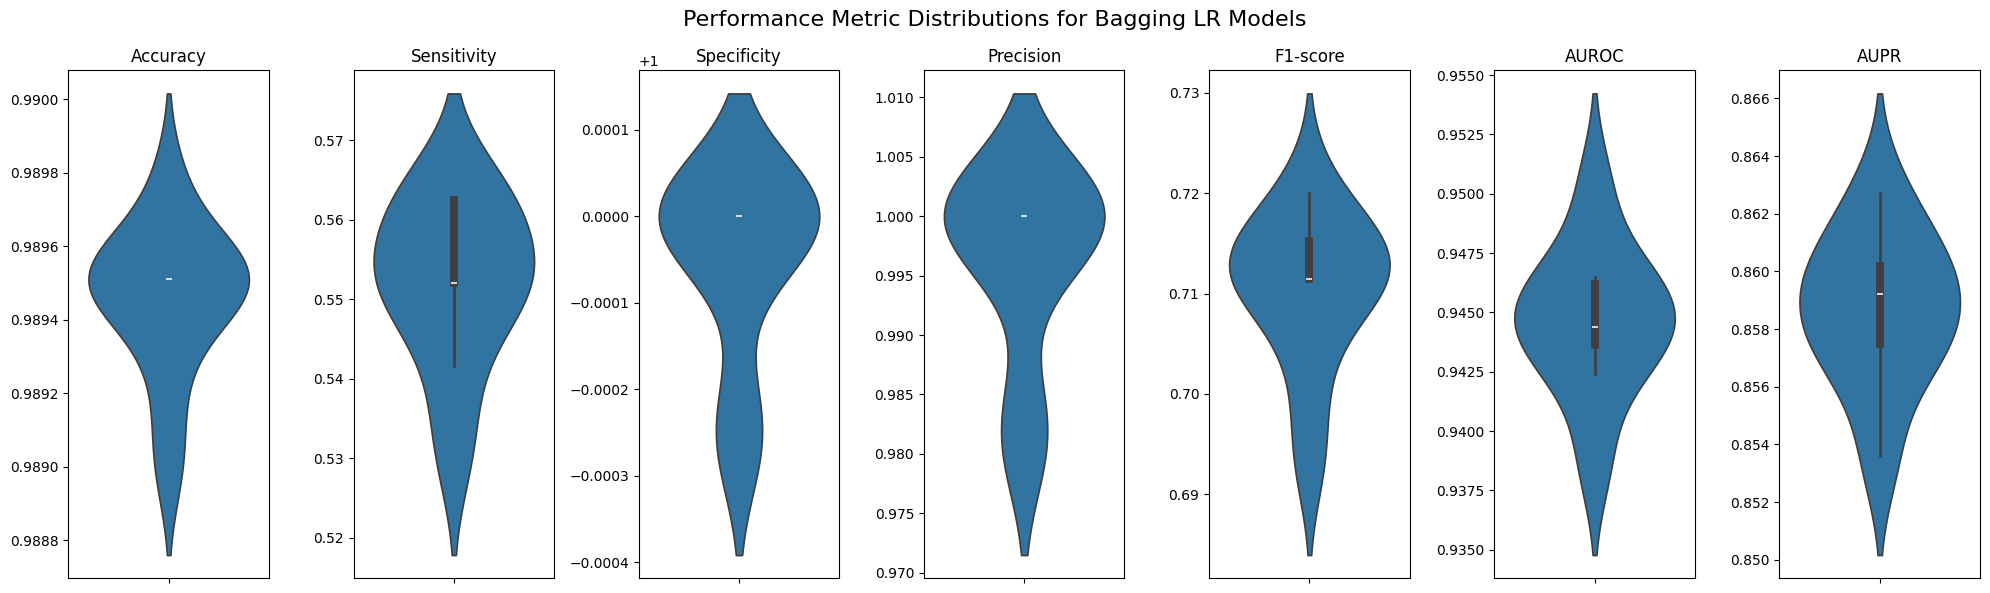

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_violins(metrics):
    n_metrics = len(metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(20, 6))
    fig.suptitle('Performance Metric Distributions for Bagging LR Models', fontsize=16)

    for i, (metric, values) in enumerate(metrics.items()):
        sns.violinplot(data=values, ax=axes[i])
        axes[i].set_title(metric)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Create and train BaggingLR
bagging_lr = BaggingLR(n_estimators=9, custom=True)
bagging_lr.fit(X_train, y_train)

# Collecting performance metrics for each bagging LR model
metrics = {metric: [] for metric in ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-score', 'AUROC', 'AUPR']}

for model in bagging_lr.models:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results = evaluate_model(y_test, y_pred, y_prob)
    for metric, value in results.items():
        metrics[metric].append(value)

# Creating violin plots
plot_violins(metrics)

In [50]:
import pandas as pd
import numpy as np

def create_comparison_table(bagging_lr, y_test, X_test, voting_results, stacking_results):
    metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-score', 'AUROC', 'AUPR']

    data = {
        'Metric': metrics,
        'LR*': [f"{lr_results[metric]:.4f}" for metric in metrics],
        'Voting ensemble': [f"{voting_results[metric]:.4f}" for metric in metrics],
        'Stacking ensemble': [f"{stacking_results[metric]:.4f}" for metric in metrics]
    }

    df = pd.DataFrame(data)
    df.set_index('Metric', inplace=True)  # setting 'Metric' as index for better formatting

    # displaying the styled DataFrame with borders
    styled_table = df.style.set_properties(**{'border': '1px solid black'}) \
                            .set_table_attributes('style="border-collapse:collapse; border: 1px solid black;"')

    return styled_table

# creating the comparison table
comparison_table = create_comparison_table(bagging_lr, y_test, X_test, voting_results, stacking_results)

# displaying the styled table in a Jupyter notebook
comparison_table

,LR*,Voting ensemble,Stacking ensemble
Metric,,,
Accuracy,0.9905,0.9895,0.9895
Sensitivity,0.5867,0.5521,0.5625
Specificity,1.0000,1.0000,0.9998
Precision,1.0000,1.0000,0.9818
F1-score,0.7395,0.7114,0.7152
AUROC,0.9729,0.7760,0.9380
AUPR,0.9071,0.5626,0.8569
